The provided code is intended to perform web scraping on https://www.cheapflights.ca/, specifically targeting flight information for routes from Toronto to Casablanca on February 1st.

In [5]:
#importing libraries
from time import sleep
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.by import By
from bs4 import BeautifulSoup
import os
# Open URL 
driver = webdriver.Chrome()
url= 'https://www.cheapflights.ca/flight-search/YTO-CMN/2024-02-01?sort=bestflight_a'
driver.get(url)
sleep(20)
#Click to show more results
driver.find_element(by=By.XPATH, value='//div[@class="ULvh-button show-more-button"]').click()
sleep(20)
driver.find_element(by=By.XPATH, value='//div[@class="ULvh-button show-more-button"]').click()
sleep(10)
#looking for the elements with the required informations (price, airlines, flight duration....)
flights=driver.find_elements(by=By.XPATH, value='//div[@class="nrc6-wrapper"]')
print(flights)
#defining the lists where to store the scraped data
list_of_prices=[]
list_of_operating_companies=[]
list_of_number_of_stops=[]
flight_duration=[]
# Using for loop to look for the information in each element and store it in the list
for WebElement in flights:
    elementHTML=WebElement.get_attribute('outerHTML')
    elementSoup=BeautifulSoup(elementHTML,'html.parser')
    #looking for the flight price
    price= elementSoup.find("div",{"class":"f8F1-price-text"})
    list_of_prices.append(price.text)
    #looking for the airline
    operating_companies = elementSoup.find("div",{"class":"J0g6-operator-text"})
    list_of_operating_companies.append(operating_companies.text)
    #looking for the number of stops
    stops = elementSoup.find("span", {"class": "JWEO-stops-text"})
    list_of_number_of_stops.append(stops.text)
    #looking for the flight duration
    duration = elementSoup.find("div", {"class": "xdW8 xdW8-mod-full-airport"})
    flight_duration.append(duration.text)
#displaying the lists   
print(list_of_prices)
print(list_of_operating_companies)
print(list_of_number_of_stops)
print(flight_duration)

[<selenium.webdriver.remote.webelement.WebElement (session="a409f096896df5bf8b501ba7c1884068", element="A6A49AA022C81D272B558489E0550D7B_element_73")>, <selenium.webdriver.remote.webelement.WebElement (session="a409f096896df5bf8b501ba7c1884068", element="A6A49AA022C81D272B558489E0550D7B_element_74")>, <selenium.webdriver.remote.webelement.WebElement (session="a409f096896df5bf8b501ba7c1884068", element="A6A49AA022C81D272B558489E0550D7B_element_75")>, <selenium.webdriver.remote.webelement.WebElement (session="a409f096896df5bf8b501ba7c1884068", element="A6A49AA022C81D272B558489E0550D7B_element_76")>, <selenium.webdriver.remote.webelement.WebElement (session="a409f096896df5bf8b501ba7c1884068", element="A6A49AA022C81D272B558489E0550D7B_element_77")>, <selenium.webdriver.remote.webelement.WebElement (session="a409f096896df5bf8b501ba7c1884068", element="A6A49AA022C81D272B558489E0550D7B_element_78")>, <selenium.webdriver.remote.webelement.WebElement (session="a409f096896df5bf8b501ba7c1884068",

We will construct a DataFrame using a list of lists

In [6]:
#building a list of lists from the scraped data
list=[]
list.append(list_of_prices)
list.append(list_of_operating_companies)
list.append(list_of_number_of_stops)
list.append(flight_duration)
print(list)

[['C$\xa01,029', 'C$\xa0771', 'C$\xa0552', 'C$\xa0608', 'C$\xa0566', 'C$\xa0752', 'C$\xa01,036', 'C$\xa0964', 'C$\xa01,029', 'C$\xa0614', 'C$\xa0807', 'C$\xa01,036', 'C$\xa0997', 'C$\xa0974', 'C$\xa01,029', 'C$\xa0977', 'C$\xa01,126', 'C$\xa01,036', 'C$\xa0927', 'C$\xa0749', 'C$\xa01,029', 'C$\xa01,007', 'C$\xa01,036', 'C$\xa01,065', 'C$\xa0876', 'C$\xa01,065', 'C$\xa0876', 'C$\xa01,065', 'C$\xa01,036', 'C$\xa01,058', 'C$\xa01,029', 'C$\xa01,065', 'C$\xa01,058', 'C$\xa01,028', 'C$\xa01,092', 'C$\xa01,092', 'C$\xa01,092', 'C$\xa01,092', 'C$\xa01,029', 'C$\xa01,151', 'C$\xa01,029', 'C$\xa01,036', 'C$\xa01,036', 'C$\xa01,065', 'C$\xa01,065', 'C$\xa01,065', 'C$\xa01,065'], ['Air Canada • Operated by Air Canada Express - Jazz', 'TAP AIR PORTUGAL • Operated by Pga Portugália Airlines', 'Multiple Airlines • Operated by LEVEL', 'Azores Airlines, Air Arabia Maroc', 'Azores Airlines, Royal Air Maroc', 'Air Transat, Royal Air Maroc', 'Air Canada', 'Porter Airlines, Royal Air Maroc', 'Air Canada •

In [15]:
#importing numpy library to use the transpose function
import numpy as np
#Transpose the list of list previously built to put each element in a column
list1=np.array(list)
transposed_list = np.transpose(list1)
# building the dataframe from the list
df=pd.DataFrame(transposed_list)
#naming the columns
df.columns=['Price', 'Airlines', 'Stops number', 'flight duration']
df

,Price,Airlines,Stops number,flight duration
0,"C$ 1,029",Air Canada • Operated by Air Canada Express - ...,1 stop,10h 25m
1,C$ 771,TAP AIR PORTUGAL • Operated by Pga Portugália ...,1 stop,11h 00m
2,C$ 552,Multiple Airlines • Operated by LEVEL,3 stops,28h 05m
3,C$ 608,"Azores Airlines, Air Arabia Maroc",2 stops,14h 45m
4,C$ 566,"Azores Airlines, Royal Air Maroc",2 stops,17h 30m
5,C$ 752,"Air Transat, Royal Air Maroc",1 stop,16h 05m
6,"C$ 1,036",Air Canada,1 stop,9h 50m
7,C$ 964,"Porter Airlines, Royal Air Maroc",1 stop,10h 10m
8,"C$ 1,029",Air Canada • Operated by Air Canada Express - ...,1 stop,10h 25m
9,C$ 614,Multiple Airlines • Operated by Porter Airline...,2 stops,18h 05m


In this section, we will perform data cleaning on our dataset

In [36]:
#keeping only the airline company name anad eliminating the rest
df['Airlines'] = df.Airlines.str.split('by', expand=True)
df=df.drop(columns='Operated by')
df

,Price,Airlines,Stops number,flight duration
0,"C$ 1,029",Air Canada,1 stop,10h 25m
1,C$ 771,TAP AIR PORTUGAL,1 stop,11h 00m
2,C$ 552,Multiple Airlines,3 stops,28h 05m
3,C$ 608,"Azores Airlines, Air Arabia Maroc",2 stops,14h 45m
4,C$ 566,"Azores Airlines, Royal Air Maroc",2 stops,17h 30m
5,C$ 752,"Air Transat, Royal Air Maroc",1 stop,16h 05m
6,"C$ 1,036",Air Canada,1 stop,9h 50m
7,C$ 964,"Porter Airlines, Royal Air Maroc",1 stop,10h 10m
8,"C$ 1,029",Air Canada,1 stop,10h 25m
9,C$ 614,Multiple Airlines,2 stops,18h 05m


In [57]:
# changing the rows with flight operated by multiple airlines to be named 'Multiple Airlines'
df['Airlines'].mask(df['Airlines'].str.contains(','), 'Multiple Airlines', inplace=True)
# Eliminating spaces in the Airlines column
df['Airlines'] = df['Airlines'].apply(lambda x: x.strip())
df

,Price,Airlines,Stops number,flight duration
0,1029,Air Canada,1 stop,10h 25m
1,771,TAP AIR PORTUGAL,1 stop,11h 00m
2,552,Multiple Airlines,3 stops,28h 05m
3,608,Multiple Airlines,2 stops,14h 45m
4,566,Multiple Airlines,2 stops,17h 30m
5,752,Multiple Airlines,1 stop,16h 05m
6,1036,Air Canada,1 stop,9h 50m
7,964,Multiple Airlines,1 stop,10h 10m
8,1029,Air Canada,1 stop,10h 25m
9,614,Multiple Airlines,2 stops,18h 05m


In [55]:
#Cleaning the price column
df['Price'] = df['Price'].str.replace('C$', '')
df['Price'] = df['Price'].str.replace(',', '')
df

,Price,Airlines,Stops number,flight duration
0,1029,Air Canada,1 stop,10h 25m
1,771,TAP AIR PORTUGAL,1 stop,11h 00m
2,552,Multiple Airlines,3 stops,28h 05m
3,608,Multiple Airlines,2 stops,14h 45m
4,566,Multiple Airlines,2 stops,17h 30m
5,752,Multiple Airlines,1 stop,16h 05m
6,1036,Air Canada,1 stop,9h 50m
7,964,Multiple Airlines,1 stop,10h 10m
8,1029,Air Canada,1 stop,10h 25m
9,614,Multiple Airlines,2 stops,18h 05m


In this section we will analyse and visualize the scraped data

In [60]:
# displaying the cheapest flight
df['Price']= df['Price'].astype(int)
df[df.Price==df.Price.min()]

,Price,Airlines,Stops number,flight duration
2,552,Multiple Airlines,3 stops,28h 05m


In [61]:
# displaying the most expensive flight
df[df.Price==df.Price.max()]

,Price,Airlines,Stops number,flight duration
39,1151,Multiple Airlines,2 stops,14h 15m


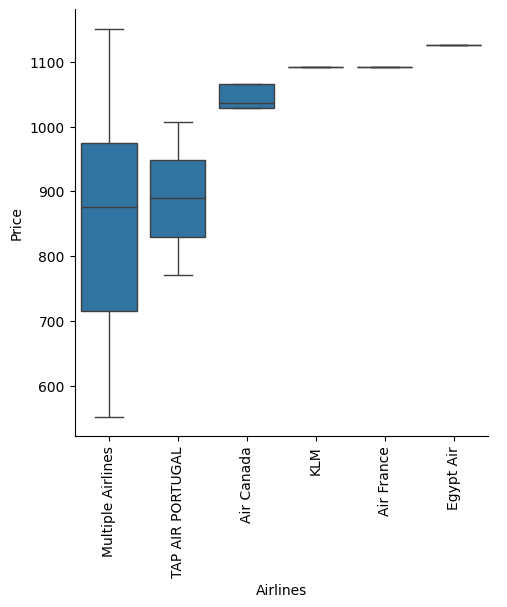

In [78]:
#Create a boxplot using Seaborn to visualize the distribution of flight prices across different airlines
import seaborn as sns
df['Airlines']= df['Airlines'].astype(str)
chart=sns.catplot(y="Price", x="Airlines", data=df.sort_values("Price",ascending=True), kind="box")
chart.set_xticklabels(rotation=90)
plt.show()

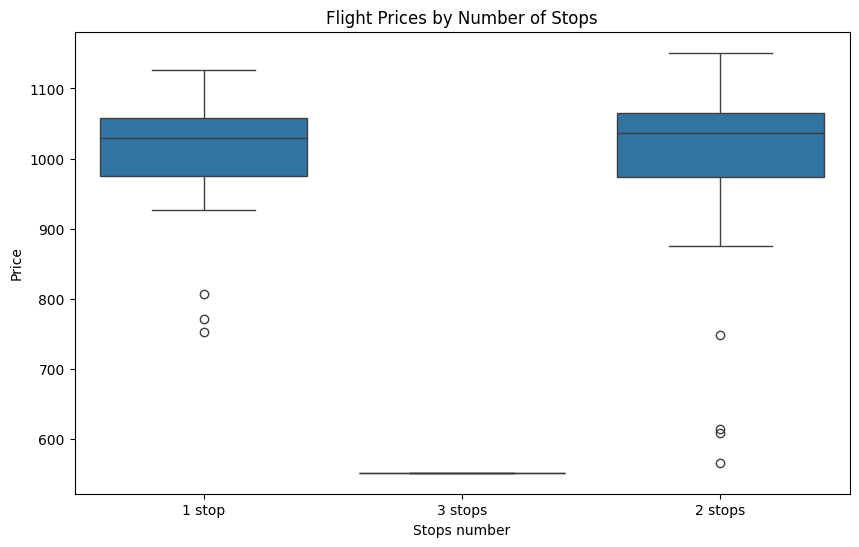

              count        mean         std    min     25%     50%     75%  \
Stops number                                                                 
1 stop         22.0  995.227273   98.871697  752.0  974.75  1029.0  1058.0   
2 stops        24.0  972.250000  167.900656  566.0  974.25  1036.0  1065.0   
3 stops         1.0  552.000000         NaN  552.0  552.00   552.0   552.0   

                 max  
Stops number          
1 stop        1126.0  
2 stops       1151.0  
3 stops        552.0  


In [64]:
#Create a boxplot using Seaborn to visualize the distribution of flight prices based on the number of stop
plt.figure(figsize=(10, 6))
sns.boxplot(x='Stops number', y='Price', data=df)
plt.xlabel('Stops number')
plt.ylabel('Price')
plt.title('Flight Prices by Number of Stops')
plt.show()
# Summary statistics
summary_stats = df.groupby('Stops number')['Price'].describe()
print(summary_stats)

In [76]:
#Converting the flight duration to minutes
df['duration_minutes'] = df['flight duration'].apply(lambda x: int(x.split('h')[0]) * 60 + int(x.split(' ')[1].replace('m', '')))
df

,Price,Airlines,Stops number,flight duration,duration_minutes
0,1029,Air Canada,1 stop,10h 25m,625
1,771,TAP AIR PORTUGAL,1 stop,11h 00m,660
2,552,Multiple Airlines,3 stops,28h 05m,1685
3,608,Multiple Airlines,2 stops,14h 45m,885
4,566,Multiple Airlines,2 stops,17h 30m,1050
5,752,Multiple Airlines,1 stop,16h 05m,965
6,1036,Air Canada,1 stop,9h 50m,590
7,964,Multiple Airlines,1 stop,10h 10m,610
8,1029,Air Canada,1 stop,10h 25m,625
9,614,Multiple Airlines,2 stops,18h 05m,1085


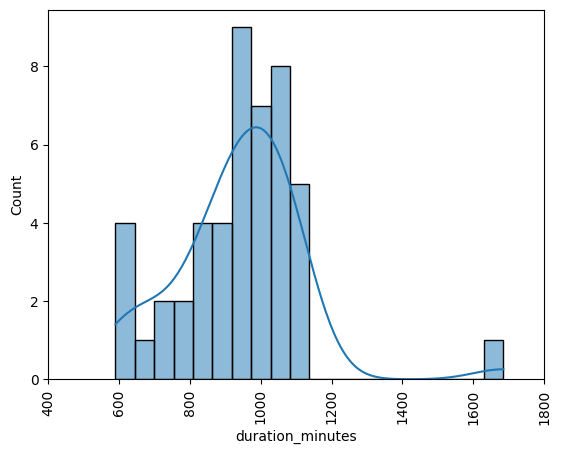

In [77]:
#Create a histogram using Seaborn to visualize the distribution of flight durations in minutes
chart=sns.histplot(df['duration_minutes'], bins=20, kde=True)
chart.set_xticks(chart.get_xticks())
chart.set_xticklabels(chart.get_xticklabels(),rotation=90)
plt.show()

Conclusion 

In conclusion, our analysis reveals that there are no direct flights available for the specified route. The more economical options tend to involve multiple companies and at least two stops, with the least expensive option on our selected day featuring three stops and an extended flight duration of over 28 hours. Further examination of prices by airline indicates that flights by multiple carriers are the most budget-friendly, while TAP Air Portugal emerges as a strong contender with reasonably priced flights.

Moreover, exploring the distribution of flight prices based on the number of stops unveils valuable insights. Routes with one stop exhibit the highest average price but a relatively narrow price range (lower standard deviation). Meanwhile, routes with two stops boast a slightly lower average price but a broader price range (higher standard deviation) compared to the one-stop routes. Remarkably, the sole route with three stops stands out for having the lowest price among the three categories.

Lastly, examining the distribution of flight durations in minutes highlights that the majority of flights fall within the approximately 1000-minute duration range. This comprehensive analysis contributes to a better understanding of the cost and duration dynamics associated with flights on the selected route.
